In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


# **1. DATA LOADING AND PREPARATION**

In [5]:
import pandas as pd
df = pd.read_csv('portfolio_data.csv')
print(df.head())


       Date        AMZN        DPZ         BTC       NFLX
0  5/1/2013  248.229996  51.190983  106.250000  30.415714
1  5/2/2013  252.550003  51.987320   98.099998  30.641428
2  5/3/2013  258.049988  52.446388  112.900002  30.492857
3  5/6/2013  255.720001  53.205257  109.599998  30.098572
4  5/7/2013  257.730011  54.151505  113.199997  29.464285


In [6]:
print(df['Date'])

0        5/1/2013
1        5/2/2013
2        5/3/2013
3        5/6/2013
4        5/7/2013
          ...    
1515     5/8/2019
1516     5/9/2019
1517    5/10/2019
1518    5/13/2019
1519    5/14/2019
Name: Date, Length: 1520, dtype: object


In [7]:
print(df['AMZN'])

0        248.229996
1        252.550003
2        258.049988
3        255.720001
4        257.730011
           ...     
1515    1917.770020
1516    1899.869995
1517    1889.979980
1518    1822.680054
1519    1840.119995
Name: AMZN, Length: 1520, dtype: float64


In [8]:
print(df['DPZ'])

0        51.190983
1        51.987320
2        52.446388
3        53.205257
4        54.151505
           ...    
1515    283.149994
1516    282.160004
1517    278.369995
1518    273.880005
1519    272.859985
Name: DPZ, Length: 1520, dtype: float64


In [9]:
print(df['BTC'])

0        106.250000
1         98.099998
2        112.900002
3        109.599998
4        113.199997
           ...     
1515    6171.959961
1516    6358.290039
1517    7191.359863
1518    7980.129883
1519    8183.830078
Name: BTC, Length: 1520, dtype: float64


# **2.BASIC TIME SERIES PLOT**

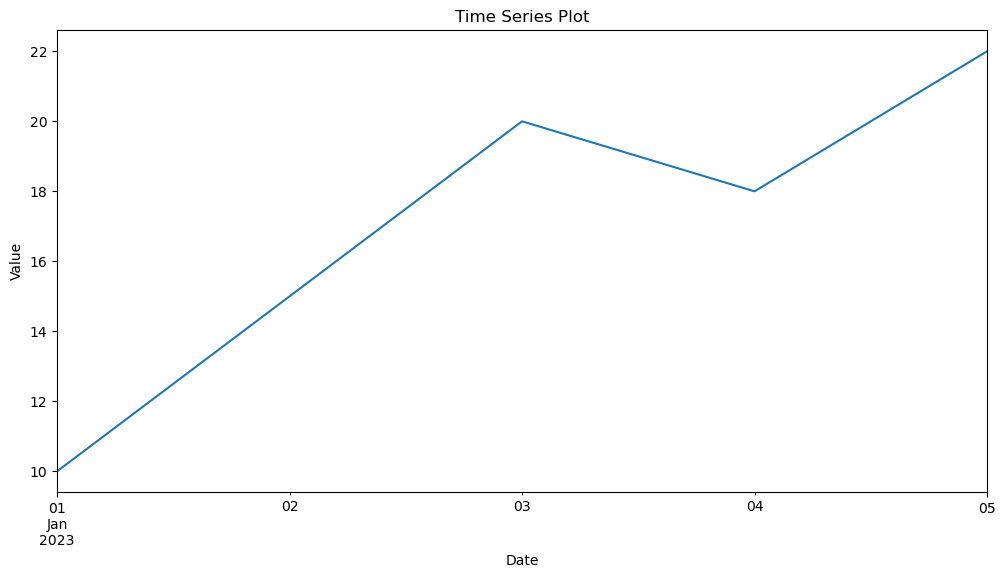

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

data = {'date': pd.to_datetime(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05']),
       'value': [10, 15, 20, 18, 22]}
df = pd.DataFrame(data)

df = df.set_index('date')

df['value'].plot(figsize=(12, 6))
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Plot')
plt.show()

# **3. MOVING AVERAGES**

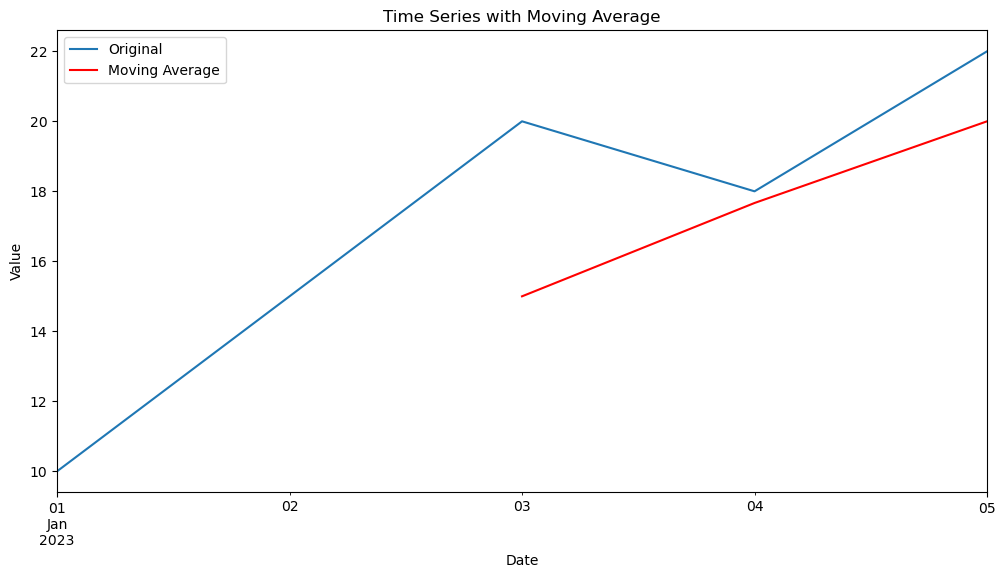

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

data = {'date': pd.to_datetime(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05']),
       'value': [10, 15, 20, 18, 22]}
df = pd.DataFrame(data)

df = df.set_index('date')

moving_average = df['value'].rolling(window=3).mean()

df['value'].plot(label='Original', figsize=(12, 6))
moving_average.plot(label='Moving Average', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series with Moving Average')
plt.legend()
plt.show()

# **4. DECOMPOSING TIME SERIES**

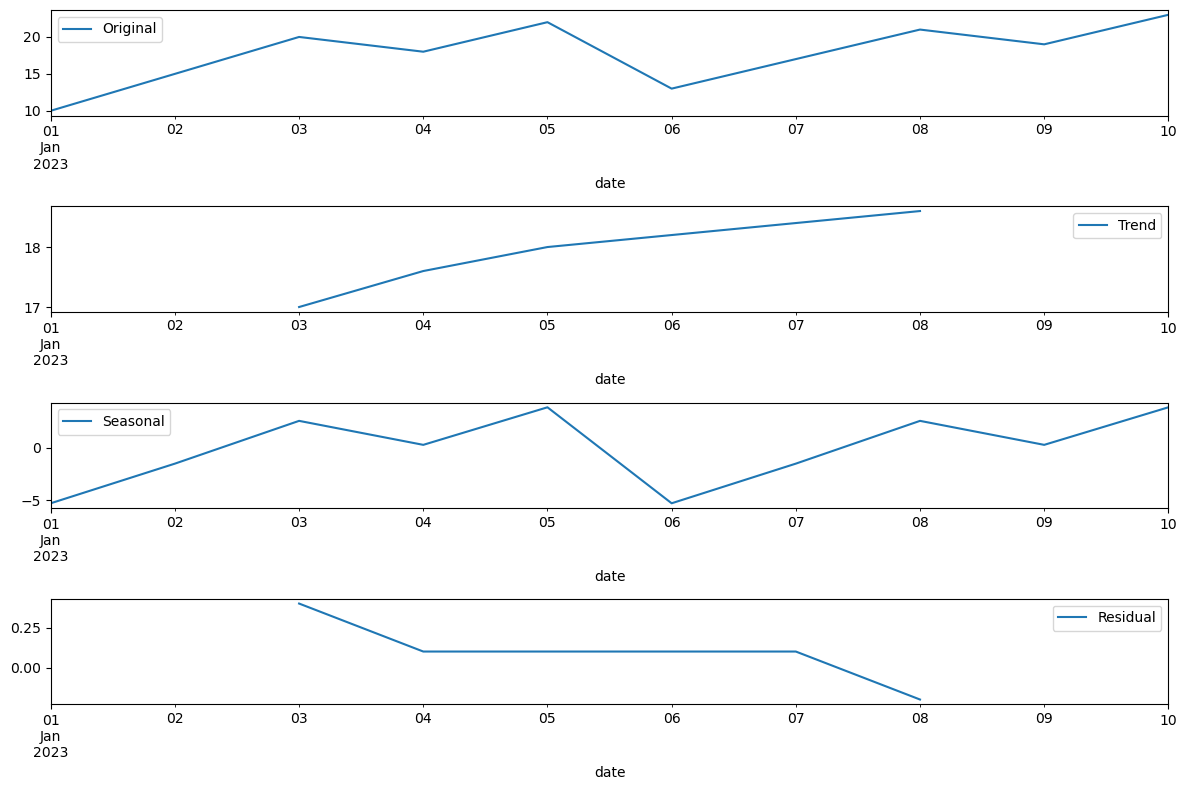

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

data = {'date': pd.to_datetime(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05',
                              '2023-01-06', '2023-01-07', '2023-01-08', '2023-01-09', '2023-01-10']),
       'value': [10, 15, 20, 18, 22, 13, 17, 21, 19, 23]}
df = pd.DataFrame(data)
df = df.set_index('date')

result = seasonal_decompose(df['value'], period=5)

plt.figure(figsize=(12, 8))

plt.subplot(411)
df['value'].plot(label='Original')
plt.legend(loc='best')

plt.subplot(412)
result.trend.plot(label='Trend')
plt.legend(loc='best')

plt.subplot(413)
result.seasonal.plot(label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
result.resid.plot(label='Residual')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

# **5. AUTOCORRELATION AND PARTIAL AUTOCORRELATION**

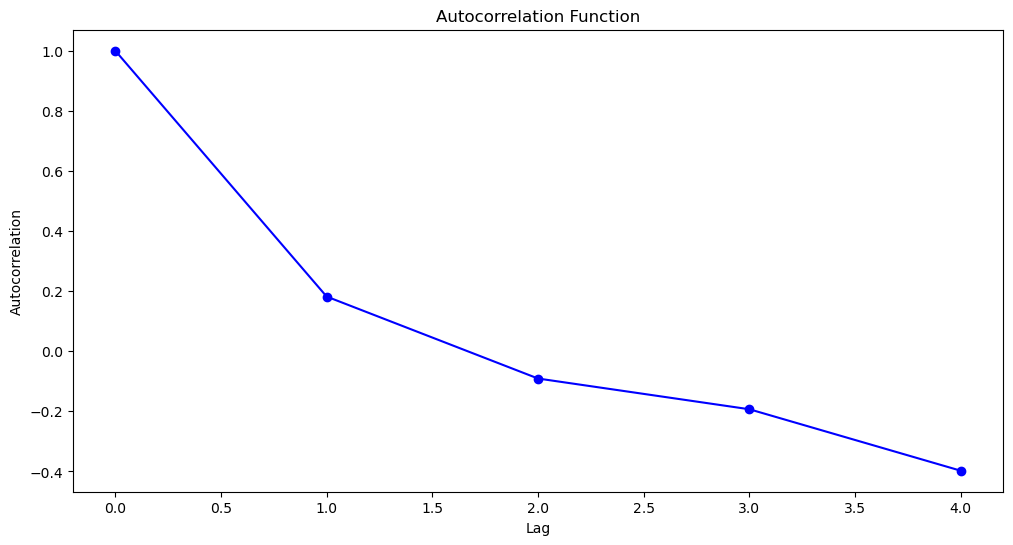

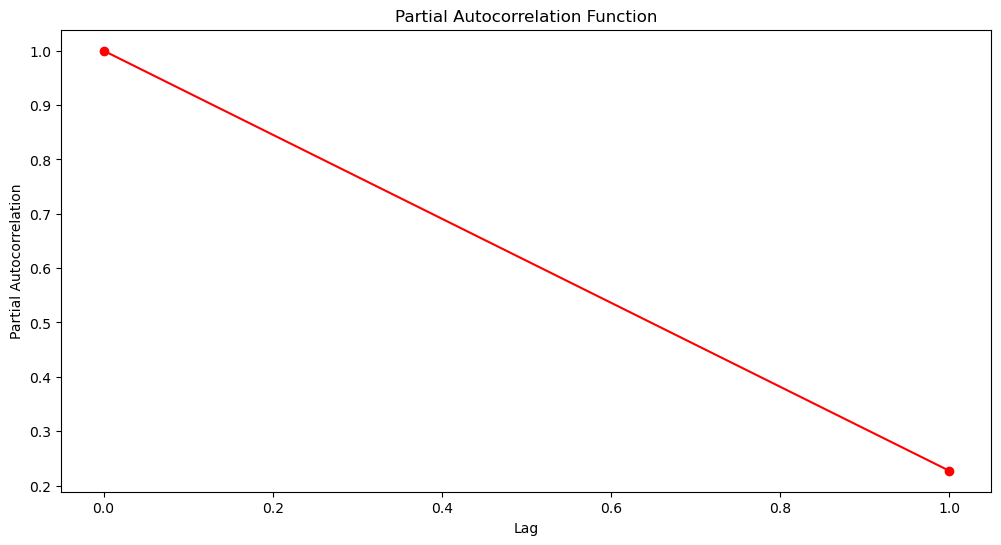

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf

data = {'date': pd.to_datetime(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05']),
       'value': [10, 15, 20, 18, 22]}
df = pd.DataFrame(data)
df = df.set_index('date')

acf_values = acf(df['value'])
pacf_values = pacf(df['value'])

plt.figure(figsize=(12, 6))
plt.plot(acf_values, marker='o', linestyle='-', color='blue')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(pacf_values, marker='o', linestyle='-', color='red')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function')
plt.show()

# **6. ARIMA MODEL**

In [14]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

data = {'date': pd.to_datetime(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05']),
       'value': [10, 15, 20, 18, 22]}
df = pd.DataFrame(data)
df = df.set_index('date')

model = ARIMA(df['value'], order=(1, 1, 1))
results = model.fit()

forecast_horizon = 5
forecast = results.forecast(steps=forecast_horizon)

print(forecast)

2023-01-06    24.054747
2023-01-07    26.109368
2023-01-08    28.163862
2023-01-09    30.218229
2023-01-10    32.272470
Freq: D, Name: predicted_mean, dtype: float64


c:\Users\sreeh_cgplzj1\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\sreeh_cgplzj1\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\sreeh_cgplzj1\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\sreeh_cgplzj1\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\sreeh_cgplzj1\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: 